<h1>Exploring Market Basket Analysis: Unveiling Purchase Patterns for Informed Marketing Strategies</h1>

In the realm of data science and machine learning, one powerful technique that sheds light on consumer behavior is Market Basket Analysis (MBA). This method uncovers transactional patterns wherein the purchase of certain products influences the acquisition of others. Employed extensively across various domains, MBA serves as a conduit for knowledge discovery in data (KDD), offering invaluable insights into customer preferences.

By delving into the associations discovered through MBA, retailers can refine their marketing tactics, gaining a deeper understanding of product pairings frequently observed in customer transactio.). Leveraging this technique addresses pertinent challenges, facilitating the identification of prevalent purchase patterns. Consequently, businesses can implement targeted discounts and promotions with precision, enhancing customer engagement and satisfaction.

In [33]:
!pip install plotly


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


                                              0.0/16.4 MB ? eta -:--:--
                                              0.1/16.4 MB 1.1 MB/s eta 0:00:16
                                              0.2/16.4 MB 1.7 MB/s eta 0:00:10
     -                                        0.6/16.4 MB 4.5 MB/s eta 0:00:04
     ------                                   2.5/16.4 MB 13.5 MB/s eta 0:00:02
     -------------                            5.7/16.4 MB 22.9 MB/s eta 0:00:01
     ---------------------                    8.9/16.4 MB 31.7 MB/s eta 0:00:01
     --------------------------              11.1/16.4 MB 65.2 MB/s eta 0:00:01
     --------------------------              11.1/16.4 MB 65.2 MB/s eta 0:00:01
     ----------------------------------      14.6/16.4 MB 50.4 MB/s eta 0:00:01
     --------------------------------------  16.4/16.4 MB 54.4 MB/s eta 0:00:01
     --------------------------------------- 16.4/16.4 MB 43.5 MB/s eta 0:00:00


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

<h1>The step by step of Market Basket Analysis using python</h1>

In the realm of data science, the online retail dataset from the UK emerges as a quintessential resource, widely employed by practitioners for its richness and versatility. Recognized for its prevalence in analytical endeavors, this dataset holds paramount importance, having served as a cornerstone in numerous projects. Accessible via the provided data source, its exploration begins with the pivotal step of importing the dataset for thorough examination. Through this process, analysts aim to unravel key insights regarding its structure, attributes, and potential applications, laying the foundation for informed analyses and strategic decision-making.

In [9]:
data = pd.read_csv('./online_retail_II.csv', encoding="ISO-8859-1")

In [13]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


As you can see, this datasets contains 8 features with 541909 rows. It shows us the transaction of an actual online retail in UK from 1 Desember 2010 until 9 Desember 2011. So, it is a whole year transaction data from an actual online retail business. In the code above, I already download the datasets from its sources and save it in the same folder as the jupyter notebook file so that I could just simply read the datasets using pandas.

<h1>2. Drop all Null Values
</h1>

In the context of machine learning model development, addressing NaN or Null values within datasets is a crucial preliminary step. While it's widely acknowledged that indiscriminately dropping all null values isn't the optimal approach, for the sake of brevity in this article, such a simplification is deemed necessary. Consequently, after this operation, the dataset entries have reduced to 406,829 instances, representing approximately 24.9% of the original dataset. This indicates that roughly a quarter of all rows contain at least one missing value, underscoring the significance of robust data handling strategies in ensuring the integrity and efficacy of subsequent analyses.

In [11]:
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417534 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      417534 non-null  object 
 1   StockCode    417534 non-null  object 
 2   Description  417534 non-null  object 
 3   Quantity     417534 non-null  int64  
 4   InvoiceDate  417534 non-null  object 
 5   Price        417534 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      417534 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.7+ MB


In [15]:
data['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

In [18]:
data.describe()

,Quantity,Price,Customer ID
count,417534.000000,417534.000000,417534.000000
mean,12.758815,3.887547,15360.645478
std,101.220424,71.131797,1680.811316
min,-9360.000000,0.000000,12346.000000
25%,2.000000,1.250000,13983.000000
50%,4.000000,1.950000,15311.000000
75%,12.000000,3.750000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [17]:
data.describe(exclude='number')

,Invoice,StockCode,Description,InvoiceDate,Country
count,417534,417534,417534,417534,417534
unique,23587,4031,4459,21786,37
top,500356,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3/7/2010 15:34,United Kingdom
freq,270,3245,3245,270,379423


In [19]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

C:\Users\deepp\AppData\Local\Temp\ipykernel_22012\1740368120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [22]:
print("This Dataset starts from {} to {}".format(data['InvoiceDate'].min(), data['InvoiceDate'].max()))


This Dataset starts from 2009-12-01 07:45:00 to 2010-12-09 20:01:00


<h1>3. Using the Positive ‘Quantity’ Values</h1>

Within the dataset, the Quantity column serves as a pivotal indicator of the number of items purchased in each transaction (InvoiceDate). However, due to the nature of online retail, cancellations are not uncommon, resulting in negative values within the Quantity column. As we pivot towards market basket analysis, our focus lies solely on discerning the contents of the actual purchases made by customers, rendering these negative values irrelevant. Consequently, they are excluded from our analysis. Notably, after this filtration process, only 397,924 entries remain, embodying transactions unaffected by cancellations and poised for comprehensive market basket analysis.

In [23]:
data_plus = data[data['Quantity']>=0]
data_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407695 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407695 non-null  object        
 1   StockCode    407695 non-null  object        
 2   Description  407695 non-null  object        
 3   Quantity     407695 non-null  int64         
 4   InvoiceDate  407695 non-null  datetime64[ns]
 5   Price        407695 non-null  float64       
 6   Customer ID  407695 non-null  float64       
 7   Country      407695 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB


In [24]:
(406829-397924) / 406829 * 100

2.188880340388714

In [25]:
data_plus.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,407695.000000,407695,407695.000000,407695.000000
mean,13.586686,2010-07-01 10:10:10.782177792,3.294188,15368.504107
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,13997.000000
50%,5.000000,2010-07-09 15:46:00,1.950000,15321.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16812.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000
std,96.842229,NaN,34.756655,1679.795700


In [27]:
top_10 = data_plus.groupby('Country').nunique().sort_values('InvoiceDate', ascending=False).head(10)
top_10

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
Country,,,,,,,
United Kingdom,17614,4001,4415,307,16601,366,3971
Germany,347,1457,1612,52,346,86,67
EIRE,316,1999,2161,73,314,119,5
France,236,1275,1398,94,235,82,47
Netherlands,135,879,936,60,135,68,22
Sweden,68,424,442,43,66,51,16
Spain,66,682,702,35,66,61,25
Belgium,52,481,521,24,52,55,17
Switzerland,40,674,719,34,40,61,14


In [28]:
top_10_transaction = pd.DataFrame(data_plus.groupby('Country').nunique().sort_values('InvoiceDate', 
                                                                        ascending=False).head(10)['InvoiceDate'])

In [38]:
top_10_transaction

,InvoiceDate
Country,
United Kingdom,16601
Germany,346
EIRE,314
France,235
Netherlands,135
Sweden,66
Spain,66
Belgium,52
Switzerland,40


In [41]:
top_10_transaction.columns

Index(['InvoiceDate'], dtype='object')

<h1>4. Create the Basket Data while Using The Transaction From UK Only</h1>

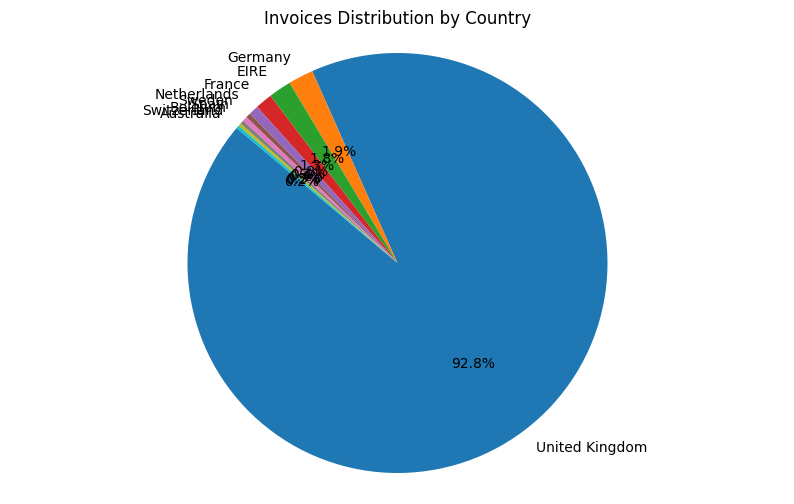

In [45]:
plt.figure(figsize=(10, 6))
plt.pie(top_10_transaction['InvoiceDate'], labels=top_10_transaction.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Invoices Distribution by Country')
plt.show()

As you could see from the visualization above, most of the transaction come from UK (91,5%). So, to make this projects is simpler and more personalized, let’s just limit the data that we will use to only the transaction that come from UK. After we understand why we should only use the transaction from UK, we will be creating the basket data. This basket data will contain the Quantity of each items bought per transaction (InvoiceDate).

In [47]:
basket_plus = (data_plus[data_plus['Country'] =="United Kingdom"].groupby(['InvoiceDate', 'Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0).set_index('InvoiceDate'))
basket_plus

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2009-12-01 07:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-01 07:46:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-01 09:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-01 09:08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-12-01 09:24:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-09 18:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-09 19:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-09 19:28:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To delineate customer purchases within the positive-quantity transactions originating from the UK, a meticulous grouping process was initiated. This involved aggregating the data by transaction (InvoiceDate) and item (Description), showcasing the quantity of each item bought. Subsequently, the aggregated quantities were summed and unstacked, offering a comprehensive view of item quantities per transaction. By reindexing the dataframe to align with the InvoiceDate, a structured representation emerged, akin to the 'baskets' customers present at the cashier. Each entry within this dataframe signifies the quantity of a specific item purchased per transaction (InvoiceDate), elucidating customer preferences and transactional patterns. Notably, a quantity of 0 indicates non-purchase, while any non-zero value reflects the corresponding quantity of items bought by the customer.

In [48]:
basket_plus.tail()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-09 18:58:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-09 19:23:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-09 19:28:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-09 19:32:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-09 20:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h1>5. Encode The Data</h1>

In market basket analysis, the number of each item bought is not really important. The important one is whether an item is bought or not. Because, we only would like to know, what is the association of buying some items and buying some others. So, we need to encode the basket data into a binary data that shows whether an items is bought (1) or not (0). Here’s how I did that.

In [49]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_encode_plus = basket_plus.applymap(encode_units)
basket_encode_plus

C:\Users\deepp\AppData\Local\Temp\ipykernel_22012\2006658954.py:7: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2009-12-01 07:45:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 07:46:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 09:06:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 09:08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 09:24:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-09 18:58:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 19:23:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 19:28:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
basket_encode_plus.tail()

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2010-12-09 18:58:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 19:23:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 19:28:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 19:32:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 20:01:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, I created a function called encode_units that have one particular job; encode the units. That seems obvious. If the units is equal to or less than 0, the function will change it into 0 (Not bought). If the units is more than or equal to 1, it will change the units into 1 (bought). This way, we generated a data frame that shows us whether a particular items is bought or not.

<h1>6. Filter The Transaction : Bought More Than 1 Items Only</h1>

In market basket analysis, we are going to uncover the association between 2 or more items that is bought according to historical data. So, it is less useful if a transaction only bought a single items. I mean, how could we uncover the association between 2 or more items if there is only 1 item bought? Hence, the next step is to filter out the transactions that is bought more than 1 item.

In [51]:
basket_filter_plus = basket_encode_plus[(basket_encode_plus > 0).sum(axis=1) >= 2]
basket_filter_plus

Description,DOORMAT UNION JACK GUNS AND ROSES,3 STRIPEY MICE FELTCRAFT,4 PURPLE FLOCK DINNER CANDLES,ANIMAL STICKERS,BLACK PIRATE TREASURE CHEST,BROWN PIRATE TREASURE CHEST,Bank Charges,CAMPHOR WOOD PORTOBELLO MUSHROOM,CHERRY BLOSSOM DECORATIVE FLASK,FAIRY CAKE CANDLES,...,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE DOUBLE PLANTER,ZINC HEART LATTICE PLANTER BOWL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC POLICE BOX LANTERN,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK
InvoiceDate,,,,,,,,,,,,,,,,,,,,,
2009-12-01 07:45:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 07:46:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 09:06:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 09:08:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009-12-01 09:24:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-09 18:58:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 19:23:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-12-09 19:28:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


According to the result above, we could see that there are 15376 transaction that bought more than 1 items. It means, 92.35 % of the basket data is a transaction that is bought more than 1 item.

In [52]:
!pip install mlxtend

                                              0.0/1.4 MB ? eta -:--:--
                                              0.0/1.4 MB 660.6 kB/s eta 0:00:03
     -                                        0.0/1.4 MB 495.5 kB/s eta 0:00:03
     -                                        0.0/1.4 MB 495.5 kB/s eta 0:00:03
     -                                        0.0/1.4 MB 495.5 kB/s eta 0:00:03
     -                                        0.0/1.4 MB 495.5 kB/s eta 0:00:03
     ---                                      0.1/1.4 MB 516.7 kB/s eta 0:00:03
     ------                                   0.2/1.4 MB 765.3 kB/s eta 0:00:02
     ------------                             0.4/1.4 MB 1.4 MB/s eta 0:00:01
     -------------------------------------    1.4/1.4 MB 3.6 MB/s eta 0:00:01
     ---------------------------------------- 1.4/1.4 MB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<h1>7. Apply the Apriori Algorithm</h1>

After generating the dataset above, it is now the time for us to use the apriori algorithm. Apriori algorithm is simply used to find the frequently bought items in the dataset.

In applying the apriori algorithm, first you have to install the library called “mlxtend”. You can just simply type “pip install mlxtend” and you’re ready to go! After install the packages, here’s how I apply the Apriori Algorithm.

In [53]:
from mlxtend.frequent_patterns import apriori

In [54]:
frequent_itemsets_plus = apriori(basket_filter_plus, min_support=0.03, 
                                 use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)

frequent_itemsets_plus['length'] = frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

frequent_itemsets_plus

C:\Users\deepp\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



,support,itemsets,length
0,0.187439,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.096601,(REGENCY CAKESTAND 3 TIER),1
2,0.081538,(ASSORTED COLOUR BIRD ORNAMENT),1
3,0.080817,(STRAWBERRY CERAMIC TRINKET BOX),1
4,0.073941,(HOME BUILDING BLOCK WORD),1
...,...,...,...
94,0.030781,(PLASTERS IN TIN VINTAGE PAISLEY ),1
95,0.030519,(RED SPOTTY CHARLOTTE BAG),1
96,0.030388,(RIBBON REEL STRIPES DESIGN ),1
97,0.030323,(SINGLE HEART ZINC T-LIGHT HOLDER),1


In applying apriori algorithm, we are able to define the frequent data that we wanted by giving the support value. In this case, I define a frequently bought items as an items that is bought as many as 3% out of the whole transaction, it means I will give the support value of 0.03. After that, I added another column called length that contain the number of item that is bought.

As you can see that there are 108 transaction that is consider as a frequently bought items. It is shown in the picture that White hanging Heart T-Light Holder is the most frequently bought items with the support value of 0.121358. It means the item is bought 1866 times out of the whole transaction.

In [55]:
frequent_itemsets_plus[ (frequent_itemsets_plus['length']  == 2) &
                        (frequent_itemsets_plus['support'] >= 0.03) ]

,support,itemsets,length
41,0.045059,"(RED HANGING HEART T-LIGHT HOLDER, WHITE HANGI...",2
62,0.038182,"(SWEETHEART CERAMIC TRINKET BOX, STRAWBERRY CE...",2
71,0.035497,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA...",2
82,0.033663,"(HOME BUILDING BLOCK WORD, LOVE BUILDING BLOCK...",2
88,0.031895,"(HEART OF WICKER LARGE, HEART OF WICKER SMALL)",2


<h1>8. Finding The Association Between Frequently Bought Items</h1>

After applying the apriori algorithm and finding the frequently bought item, it is now the time for us to apply the association rules. From association rules, we could extract information and even discover knowledge about which items that is more effective to be sold together. That is the whole point of this project.


In [56]:
from mlxtend.frequent_patterns import association_rules

In [57]:
association_rules(frequent_itemsets_plus, metric='lift', 
                  min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE ),0.051477,0.063789,0.035497,0.689567,10.810067,0.032213,3.015826,0.956744
1,(WOODEN FRAME ANTIQUE WHITE ),(WOODEN PICTURE FRAME WHITE FINISH),0.063789,0.051477,0.035497,0.556468,10.810067,0.032213,2.138568,0.969326
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.049840,0.080817,0.038182,0.766097,9.479367,0.034154,3.929764,0.941428
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.080817,0.049840,0.038182,0.472447,9.479367,0.034154,1.801072,0.973156
4,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.064248,0.055734,0.031895,0.496432,8.907196,0.028314,1.875152,0.948682
5,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.055734,0.064248,0.031895,0.572268,8.907196,0.028314,2.187706,0.940128
6,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.060646,0.073941,0.033663,0.555076,7.507041,0.029179,2.081386,0.922753
7,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.073941,0.060646,0.033663,0.455270,7.507041,0.029179,1.724441,0.936000
8,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.187439,0.061235,0.045059,0.240391,3.925706,0.033581,1.235853,0.917185
9,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.061235,0.187439,0.045059,0.735829,3.925706,0.033581,3.075890,0.793882


From the association_rules results above, we could see that ROSES REGENCY TEACUP AND SAUCER and GREEN REGENCY TEACUP AND SAUCER are the items that has the highest association each other since these two items has the highest “lift” value. The higher the lift value, the higher the association between the items willl. If the lift value is more than 1, it is enough for us to say that those two items are associated each other. In thise case, the highest value is 17.717 which is very high. It means these 2 items are very good to be sold together.

Beside that, we could also see the support value of ROSES REGENCY TEACUP AND SAUCER and GREEN REGENCY TEACUP AND SAUCER are 0.0309% which means there are 3.09% out of total transaction that these 2 items were sold together. In number, it is 476 times.

<h1>Conclusions</h1>

In our exploration of Market Basket Analysis utilizing authentic online retail transaction data from the UK, we unveil actionable insights poised to inform data-driven marketing strategies and decision-making processes. Within this dataset, several business insights emerge:

Item Placements Optimization: Through our analysis, we identify synergistic item pairs such as "ROSES REGENCY TEACUP AND SAUCER" and "GREEN REGENCY TEACUP AND SAUCER," suggesting an opportunity for strategic item placements. Placing these items in close proximity, such as on the same shelf, can enhance visibility and potentially stimulate cross-purchases.

Product Bundling Opportunities: The identification of complementary products like "ROSES REGENCY TEACUP AND SAUCER" and "GREEN REGENCY TEACUP AND SAUCER" unveils prospects for product bundling strategies. Offering these items as a bundled package at a discounted rate compared to individual purchases can incentivize customers to opt for the bundled offer, thereby driving sales and revenue.

Customer Recommendation and Discounts: Leveraging insights from the analysis, targeted customer recommendations and discounts can be implemented at the point of sale. Placing "Roses Regency Teacup and Saucer" strategically at the cashier allows for personalized recommendations to customers purchasing "Green Regency Teacup and Saucer," enticing them with a discounted offer on the complementary item, thus fostering increased sales and customer satisfaction.

By harnessing these insights, businesses can optimize product placements, capitalize on bundling opportunities, and implement targeted marketing strategies, ultimately fostering enhanced customer engagement and profitability.